In [54]:
import nltk

In [55]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection'
                                          )]

In [56]:
print(len(messages))

5574


In [57]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

## Here we are printing the first 50 messages

In [58]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [59]:
import pandas as pd

In [60]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [61]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [63]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

## Adding new column length

In [64]:
messages['length'] = messages['message'].apply(len)

In [65]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
%matplotlib inline

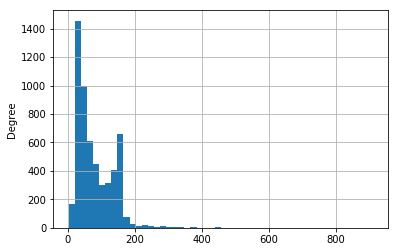

In [68]:
messages['length'].plot(bins=50, kind='hist') 

In [69]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [70]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24d3f048>,
      dtype=object)

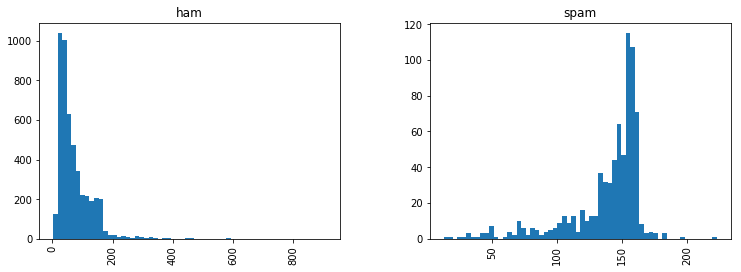

In [71]:
messages.hist(column = 'length', by = 'label', bins = 60, figsize=(12,4), grid=True)

In [72]:
import string

In [73]:
mess = 'Sample message! Notice it has punc:::'

In [74]:
nopunc = [c for c in mess if c not in string.punctuation]

In [75]:
from nltk.corpus import stopwords

## How to join indices in a list

In [76]:
nopunc = ''.join(nopunc)
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punc']

## This is for cleaning the sentence to remove stopwords

In [77]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [78]:
new_mess = []
for word in nopunc.split():
    if word.lower() not in stopwords.words('english'):
        new_mess.append(word)
new_mess

['Sample', 'message', 'Notice', 'punc']

## Function for doing everything above 
### 1. Remove punctuation, and join vector
### 2. Remove stopwords
### 3. Return list of clean text words

In [80]:
def text_process(mess):
    #remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation] 
    nopunc = ''.join(nopunc)
    
    #remove stopwords
    clean_mess = []
    for word in mess.split():
        if word not in stopwords.words('english'):
            clean_mess.append(word)
            
    return clean_mess
    
    

In [82]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point,, crazy.., Available, bugis...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3    [U, dun, say, early, hor..., U, c, already, sa...
4    [Nah, I, think, goes, usf,, lives, around, tho...
Name: message, dtype: object

## Bag of words

1. Count how many times a word occurs in each message (TERM FREQUENCY)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 Norm)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [87]:
print(len(bow_transformer.vocabulary_))

15542


In [89]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [90]:
bow4 = bow_transformer.transform([mess4])

In [91]:
print(bow4)

  (0, 5205)	2
  (0, 5969)	1
  (0, 6844)	1
  (0, 8145)	1
  (0, 8172)	1
  (0, 9540)	1
  (0, 12889)	1
  (0, 12893)	1


In [92]:
print(bow4.shape)

(1, 15542)


In [94]:
bow_transformer.get_feature_names()[12893]

'say...'

## Transforming all the messages in the dataframe

In [95]:
messages_bow = bow_transformer.transform(messages['message'])

In [96]:
print('Shape of the Sparse matrix:', messages_bow.shape)

Shape of the Sparse matrix: (5572, 15542)


In [98]:
messages_bow.nnz #amount of nonzero occurences 

58665

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer

In [100]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [101]:
tfidf4 = tfidf_transformer.transform(bow4)

In [102]:
print(tfidf4)

  (0, 12893)	0.4233059460411058
  (0, 12889)	0.2755291764174293
  (0, 9540)	0.4380858589249147
  (0, 8172)	0.33125276859338976
  (0, 8145)	0.298957460286238
  (0, 6844)	0.298957460286238
  (0, 5969)	0.2978282751277178
  (0, 5205)	0.4192795307561116


In [105]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [106]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Classifier Naive Bayes

In [107]:
from sklearn.naive_bayes import MultinomialNB

In [108]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [110]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [112]:
messages['label'][3]

'ham'

## Train, Test, Split

In [114]:
from sklearn.model_selection import train_test_split

In [119]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

## Pipeline to store our workflow

In [121]:
from sklearn.pipeline import Pipeline

In [123]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [124]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a242a0b70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [125]:
predictions = pipeline.predict(msg_test)

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       977
        spam       0.99      0.69      0.81       138

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.96      1115

